In [3]:
# <선형회귀 실습>
# "work_grade.csv" 데이터를 로드해 주세요.
# shape, head 확인
# 데이터 기술통계량 구하기
# 수치형 변수 시각화
# 범주형 변수 시각화
# grade 예측을 위한 선형회귀 모델 적합을 위해 범주형 변수들을 수치형으로 변환해주세요.
# 종속변수를 y로 놓고, 종속변수를 제외한 모든 변수들을 독립변수 X로 구분해주세요.
# 선형회귀 모델 적합(fit)을 수행해주세요(힌트 : sm.OLS). 선형회귀 모델에 상수항을 추가해주세요.
# 독립변수의 개수까지 고려한 결정계수 값이 얼마인지 소수 3째자리까지 반올림해서 주석으로 써주세요.
# 모델에서 유의미하다고 생각되는 모든 설명변수와 그 이유에 대해 주석으로 써주세요.

In [4]:
import pandas as pd
import numpy as np

# 그래프 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀 라이브러리
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm             # 통계적 해석 기능
from sklearn.metrics import r2_score     # r-squared : 회귀 성능 지표

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [5]:
# "work_grade.csv" 데이터를 로드해 주세요.
# shape, head 확인
df_work = pd.read_csv("data/work_grade.csv")

print(df_work.shape)
df_work.head()

(105, 6)


,ID,sex,department,work_hour,achievement,grade
0,1,male,A,1756,so many,3.59
1,2,male,C,1709,little,3.46
2,3,female,A,1915,medium,3.47
3,4,female,B,1824,medium,3.44
4,5,male,A,1764,very little,2.74


# 1. EDA(탐색적 데이터 분석)

### 수치형 변수 집계와 시각화

In [6]:
# 수치형 변수 기술통계량  
#describe 디스크라이브(수치형만 알려줌) / 전체적인 요약 통계 정보를 한 번에 보여주는 명령어야.
df_work.describe()

,ID,work_hour,grade
count,105.000000,105.000000,105.000000
mean,53.000000,1812.942857,3.365714
std,30.454885,127.116908,0.528455
min,1.000000,1518.000000,1.740000
25%,27.000000,1728.000000,3.030000
50%,53.000000,1795.000000,3.370000
75%,79.000000,1877.000000,3.690000
max,105.000000,2360.000000,4.920000


In [7]:
# 범주형 변수 파악 
# 데이터 종류	타입✨✨
# 숫자 (정수)	int64
# 숫자 (소수)	float64
# 글자	object✨
df_work.describe(include='object')  #include 인클루드(포함하다) 무자열을 포함해서 알려달라라는 최종뜻이된다

,sex,department,achievement
count,105,105,105
unique,2,3,5
top,female,A,medium
freq,53,36,27


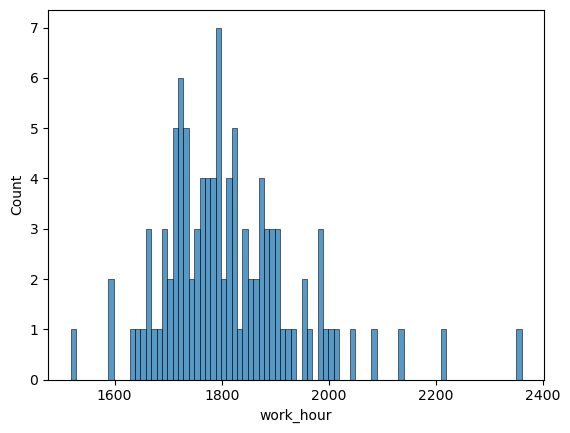

In [8]:
# work_hour 히스토그램                        #빈위드쓰 (구간의 너비)
sns.histplot(df_work, x='work_hour', binwidth=10);

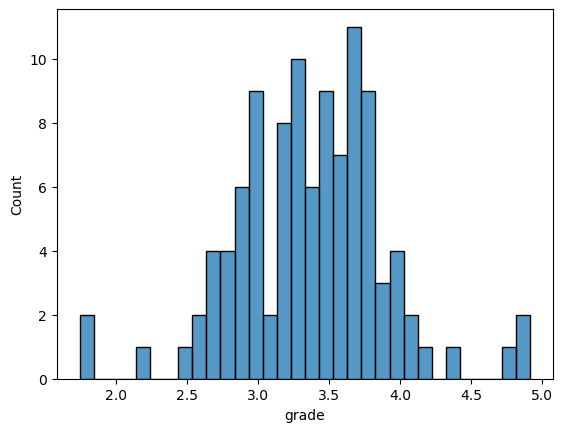

In [9]:
# grade 히스토그램
sns.histplot(df_work, x='grade', binwidth=0.1);

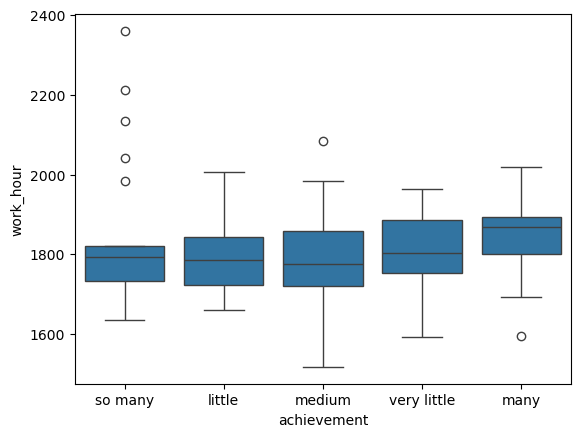

In [10]:
# work_hour 상자그림(x='achievement')
sns.boxplot(df_work, y='work_hour', x='achievement');

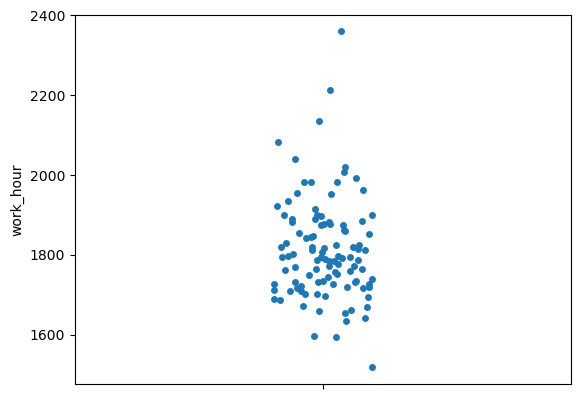

In [11]:
# work_hour stripplot
sns.stripplot(df_work, y='work_hour');

In [12]:
# 수치형 변수시각화 인사이트 

# 가장 많은 직원이 1,700시간에서 1,900시간 사이의 근로 시간을 기록하고 있습니다.
# 오른쪽으로 꼬리가 긴 형태(우측 편향)를 보입니다. 평균값(1,813)이 중앙값(1,795)보다 높은 것 역시 이를 뒷받침합니다. 
# 상당히 높은 근로 시간을 기록하는 소수의 인원이 전체 평균을 높이고 있음을 시사합니다.

# 특히 최대 2,360시간까지 일하는 사례가 발견되는데, 
# 이 그룹의 성과(achievement)나 성적(grade)이 다른 그룹과 어떻게 차이가 나는지 
# 추가로 분석해볼 필요가 있겠다.

### 범주형 변수 시각화

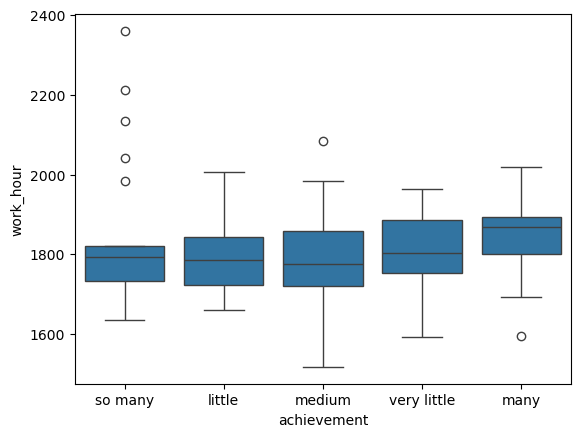

In [13]:
# work_hour 상자그림(x='achievement')    어치브먼트(성취,성과)
sns.boxplot(df_work, y='work_hour', x='achievement');

In [14]:
# 인사이트: 
# "많이 일하는 사람이 성취도도 높은가?"라는 질문에 답할 수 있습니다. 
# 그래프(Work Hours by Achievement Level)를 보면, 'so many' 성취도를 가진 그룹에 
# 근로 시간이 매우 높은 이상치(Outliers)들이 몰려 있는 것을 확인할 수 있어, 
# 극단적인 고근로가 높은 성취도로 이어지는 경향이 있음을 시사합니다.

In [15]:
# 부서별 성취 비율을 나타낸 누적 막대 그래프 

# 1. 데이터 로드
df = pd.read_csv('datwork_grade.csv')

# 2. 성취도 순서 정의 (낮음 -> 높음 순으로 정렬하기 위함)
achievement_order = ['very little', 'little', 'medium', 'many', 'so many']

# 3. 부서별 성취도 빈도 계산 (교차 테이블 생성)
dept_achieve_counts = pd.crosstab(df['department'], df['achievement'])

# 4. 정해진 순서대로 컬럼 재정렬
dept_achieve_counts = dept_achieve_counts[achievement_order]

# 5. 각 행(부서)의 합계를 100%로 환산하여 비율 계산
dept_achieve_pct = dept_achieve_counts.div(dept_achieve_counts.sum(axis=1), axis=0) * 100

# 6. 시각화 (누적 막대 그래프)
ax = dept_achieve_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='white')

# 7. 그래프 세부 설정
plt.title('Achievement Level Proportion by Department (%)', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0) # x축 부서명 가로로 유지
plt.legend(title='Achievement', bbox_to_anchor=(1.05, 1), loc='upper left')

# 8. 막대 안에 백분율 수치 텍스트 추가
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0: # 비율이 0인 경우는 텍스트 제외
        x, y = p.get_xy() 
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', 
                ha='center', va='center', fontsize=9, color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('dept_achievement_ratio.png')

FileNotFoundError: [Errno 2] No such file or directory: 'datwork_grade.csv'

In [ ]:
# 그래프 해석 포인트
# 부서 C의 고성과 비중: 그래프의 노란색 부분(so many)을 보면, 부서 C가 25.7%로 다른 부서(A: 19.4%, B: 14.7%)에 비해 성취도가 높은 직원의 비율이 가장 높다는 것을 명확히 알 수 있습니다.
# 부서 A의 낮은 성취도 비중: 보라색 부분(very little)을 보면 부서 A가 25.0%로 성취도가 매우 낮은 직원 비중이 가장 큽니다.
# 부서 B의 중간 분포: 부서 B는 medium 비중이 32.4%로 다른 부서보다 월등히 높아, 평이한 성취도를 가진 직원이 많다는 특징을 보입니다.

# 2. 선형회귀 모델링

In [ ]:
# grade 예측을 위한 선형회귀 모델 적합을 위해 범주형 변수들을 수치형으로 변환해주세요.
# 종속변수를 y로 놓고, 종속변수를 제외한 모든 변수들을 독립변수 X로 구분해주세요.
# 선형회귀 모델 적합(fit)을 수행해주세요(힌트 : sm.OLS). 선형회귀 모델에 상수항을 추가해주세요.
# 독립변수의 개수까지 고려한 결정계수 값이 얼마인지 소수 3째자리까지 반올림해서 주석으로 써주세요.
# 모델에서 유의미하다고 생각되는 모든 설명변수와 그 이유에 대해 주석으로 써주세요.

In [16]:
df_work.head()

,ID,sex,department,work_hour,achievement,grade
0,1,male,A,1756,so many,3.59
1,2,male,C,1709,little,3.46
2,3,female,A,1915,medium,3.47
3,4,female,B,1824,medium,3.44
4,5,male,A,1764,very little,2.74


In [17]:
# grade 예측을 위한 선형회귀 모델 적합을 위해 범주형 변수들을 수치형으로 변환해주세요 /겟덤미스 원핫인코딩
df_dummies = pd.get_dummies(data=df_work, dtype='int', drop_first=True)   
df_dummies.head(5)

,ID,work_hour,grade,sex_male,department_B,department_C,achievement_many,achievement_medium,achievement_so many,achievement_very little
0,1,1756,3.59,1,0,0,0,0,1,0
1,2,1709,3.46,1,0,1,0,0,0,0
2,3,1915,3.47,0,0,0,0,1,0,0
3,4,1824,3.44,0,1,0,0,1,0,0
4,5,1764,2.74,1,0,0,0,0,0,1


In [18]:
# 종속변수를 y로 놓고, 종속변수를 제외한 모든 변수들을 독립변수 X로 구분해주세요.

# X : 설명변수/독립변수    # y: 관심변수/종속변수 
X = df_dummies.drop(columns=['grade']) #df_dummies에서'charges' 컬럼만 제외하고 나머지 전부 X에 담음의미: 모델이 학습할 입력 데이터
y = df_dummies['grade']    #df_dummies에서 'charges' 컬럼만 y에 담음 의미: 예측하려는 값

In [19]:
#✔생략가능✔
# 선형회귀 모델 적합(fit)을 수행해주세요(힌트 : sm.OLS). 선형회귀 모델에 상수항을 추가해주세요. 
linear_model_work = LinearRegression(fit_intercept=True)
linear_model_work.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
#✔생략가능✔
print(linear_model_work.intercept_)  #상수항    
print(linear_model_work.coef_)  # 회귀계수

-0.09542168580571975
[-0.00087224  0.00180805  0.0720708  -0.09266164 -0.00116832  0.45445353
  0.19205769  0.77866078 -0.3862069 ]


In [21]:
#✔생략가능✔
# R2 score(설명력) : 값이 1에 가까울수록 모델이 데이터를 잘 설명한다고 볼 수 있음
from sklearn.metrics import r2_score

y_pred = linear_model_work.predict(X)  # 모델 예측값
r2_score(y, y_pred)

0.77550802893462

In [22]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)   # 상수항 추가(모델을 유연하게 만들어줌)
X_sm

,const,ID,work_hour,sex_male,department_B,department_C,achievement_many,achievement_medium,achievement_so many,achievement_very little
0,1.0,1,1756,1,0,0,0,0,1,0
1,1.0,2,1709,1,0,1,0,0,0,0
2,1.0,3,1915,0,0,0,0,1,0,0
3,1.0,4,1824,0,1,0,0,1,0,0
4,1.0,5,1764,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
100,1.0,101,1735,1,1,0,0,0,0,0
101,1.0,102,1728,0,0,1,0,0,0,1
102,1.0,103,2360,0,0,0,0,0,1,0
103,1.0,104,2212,1,0,1,0,0,1,0


In [23]:
# 선형회귀 모델 적합(fit) 
ls = sm.OLS(y, X_sm).fit()  #sm.OLS → 선형회귀 모델 만들기 / .fit() → 모델 학습
ls.summary() # → 학습 결과 표로 보기

#알 스퀘어드 R-squared:결정계수 0.776   통계에서 회귀모형이 데이터를 얼마나 잘 설명하는지 나타내는 지표입니다. 값의 범위: 0 ~ 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     36.46
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           4.76e-27
Time:                        09:10:05   Log-Likelihood:                -3.0869
No. Observations:                 105   AIC:                             26.17
Df Residuals:                      95   BIC:                             52.71
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0954      0.377     -0.253      0.801      -0.845       0.654
ID                         -0.0009      0.001     -0.988      0.326      -0.003       0.001
work_hour                   0.0018      0.000      8.744      0.000       0.001       0.002
sex_male                    0.0721      0.052      1.393      0.167      -0.031       0.175
department_B               -0.0927      0.064     -1.441      0.153      -0.220       0.035
department_C               -0.0012      0.064     -0.018      0.986      -0.129       0.127
achievement_many            0.4545      0.085      5.354      0.000       0.286       0.623
achievement_medium          0.1921      0.075      2.576      0.012       0.044       0.340
achievement_so many         0.7787      0.081      9.576      0.000       0.617       0.940
achievement_very little    -0.3862      0.087     -4.438      0.000      -0.559      -0.213
==============================================================================
Omnibus:                       27.495   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.036
Skew:                          -0.986   Prob(JB):                     5.57e-14
Kurtosis:                       6.172   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 독립변수의 개수까지 고려한 결정계수 값이 얼마인지 소수 3째자리까지 반올림해서 주석으로 써주세요.
0.754

In [ ]:
# 모델에서 유의미하다고 생각되는 모든 설명변수와 그 이유에 대해 주석으로 써주세요.